In [6]:
# ملف توليد البيانات الأولية initial.csv
import pandas as pd
from utils import generate_random_sales

# توليد تواريخ شهرية لسنة كاملة
print("Generating monthly dates from 2025-01-01 to 2025-12-01...")
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# توليد أرقام مبيعات عشوائية لكل منتج
print("Generating random sales data for each product...")
product_a_sales = generate_random_sales(50, 100, 12)
product_b_sales = generate_random_sales(30, 80, 12)
product_c_sales = generate_random_sales(20, 60, 12)
product_d_sales = generate_random_sales(10, 50, 12)

# إنشاء الجدول وحفظه
print("Saving the initial dataset to data/initial.csv...")
df = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a_sales,
    'Product_B': product_b_sales,
    'Product_C': product_c_sales,
    'Product_D': product_d_sales
})
df.to_csv('data/initial.csv', index=False)
print("Initial dataset saved successfully.")


Generating monthly dates from 2025-01-01 to 2025-12-01...
Generating random sales data for each product...
Saving the initial dataset to data/initial.csv...
Initial dataset saved successfully.


In [7]:
import pandas as pd

# تحميل البيانات الأولية
print("Loading data from data/initial.csv...")
df = pd.read_csv('data/initial.csv')

# حساب إجمالي المبيعات لكل شهر
print("Calculating total sales per month...")
df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)

# حساب متوسط المبيعات الشهرية
print("Calculating average sales per month...")
df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)

# حساب نسبة النمو الشهري
print("Calculating month-over-month growth...")
df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change().fillna(0) * 100

# استخراج رقم الشهر وتعيين الربع
print("Assigning quarter for each month...")
df['Month'] = pd.to_datetime(df['Date']).dt.month

def assign_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'
df['Quarter'] = df['Month'].apply(assign_quarter)

# تحديد المنتج الأعلى والأقل مبيعاً
print("Determining max and min sales product for each month...")
sales_cols = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
df['Max_Sales_Product'] = df[sales_cols].idxmax(axis=1)
df['Min_Sales_Product'] = df[sales_cols].idxmin(axis=1)

# حفظ الجدول النهائي
print("Saving the final dataset to data/final.csv...")
df.to_csv('data/final.csv', index=False)
print("Final dataset saved successfully.")


Loading data from data/initial.csv...
Calculating total sales per month...
Calculating average sales per month...
Calculating month-over-month growth...
Assigning quarter for each month...
Determining max and min sales product for each month...
Saving the final dataset to data/final.csv...
Final dataset saved successfully.


In [8]:
import pandas as pd

# تحميل الجدول النهائي
print("Loading data from data/final.csv...")
df = pd.read_csv('data/final.csv')

# حساب متوسط المبيعات لكل منتج في كل ربع
print("Creating average sales pivot table by quarter and product...")
pivot_avg_quarterly = df.pivot_table(
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    index='Quarter',
    aggfunc='mean'
)

# حساب إجمالي المبيعات لكل ربع
print("Creating total sales pivot table by quarter...")
pivot_total_quarterly = df.groupby('Quarter')['Total_Sales'].sum().to_frame()
pivot_total_quarterly.columns = ['Total_Sales_Per_Quarter']

# دمج الجداول وحفظها في ملف واحد
print("Saving combined pivot tables to data/output.csv...")
output_combined = pd.concat([pivot_avg_quarterly, pivot_total_quarterly], axis=1)
output_combined.to_csv('data/output.csv')
print("Pivot tables saved successfully.")


Loading data from data/final.csv...
Creating average sales pivot table by quarter and product...
Creating total sales pivot table by quarter...
Saving combined pivot tables to data/output.csv...
Pivot tables saved successfully.


In [9]:
import pandas as pd

# تحميل البيانات النهائية
print("Loading data from data/final.csv...")
df = pd.read_csv('data/final.csv')

# أفضل شهر
print("Finding the best month (highest total sales)...")
best_month_row = df.loc[df['Total_Sales'].idxmax()]
best_month = best_month_row['Date']
best_month_sales = best_month_row['Total_Sales']
print(f"Best month: {best_month}, Total sales: {best_month_sales}")

# أفضل منتج
print("Finding the best product (highest annual sales)...")
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
product_totals = df[products].sum()
best_product = product_totals.idxmax()
best_product_sales = product_totals.max()
print(f"Best product: {best_product}, Total sales: {best_product_sales}")

# أفضل ربع
print("Finding the best quarter (highest total sales)...")
quarter_totals = df.groupby('Quarter')['Total_Sales'].sum()
best_quarter = quarter_totals.idxmax()
best_quarter_sales = quarter_totals.max()
print(f"Best quarter: {best_quarter}, Total sales: {best_quarter_sales}")


Loading data from data/final.csv...
Finding the best month (highest total sales)...
Best month: 2025-07-01, Total sales: 242
Finding the best product (highest annual sales)...
Best product: Product_A, Total sales: 910
Finding the best quarter (highest total sales)...
Best quarter: Q4, Total sales: 630


Plotting line chart for monthly sales trend...


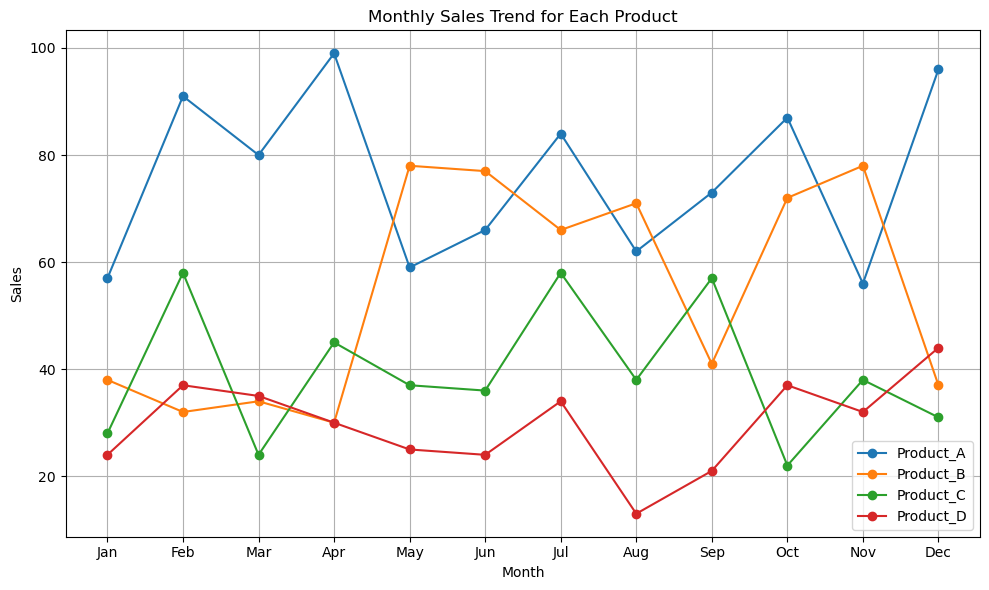

Plotting stacked bar chart of monthly sales by product...


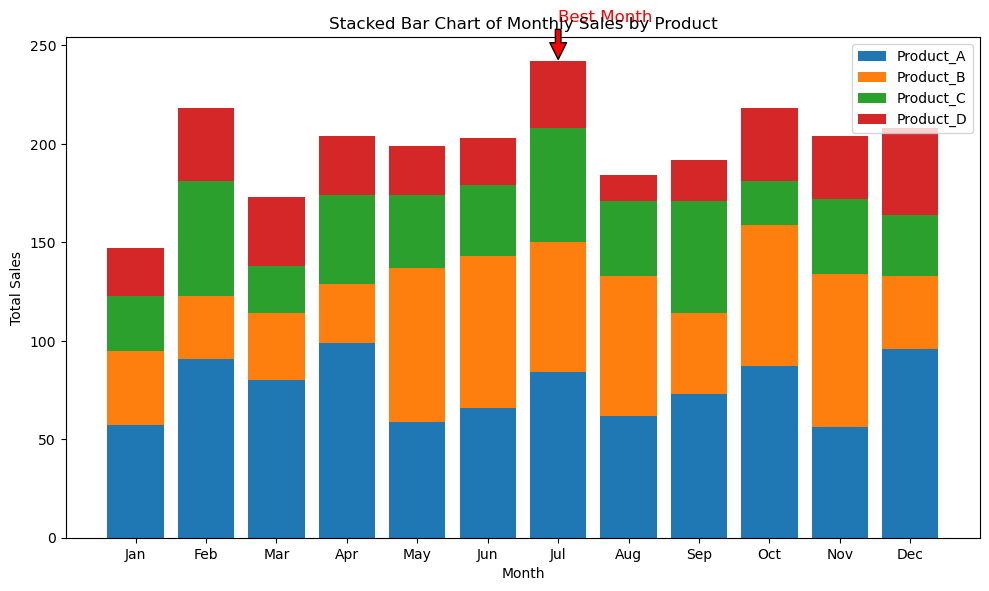

Plotting heatmap for monthly sales of each product...


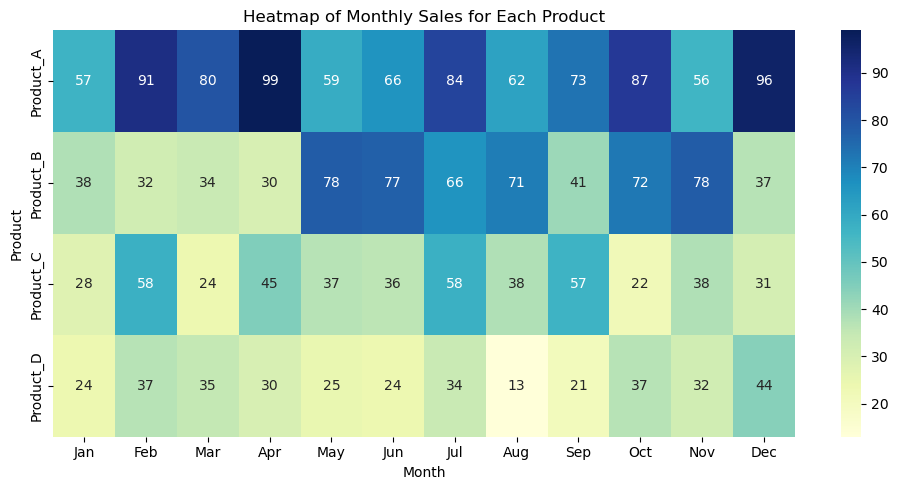

Plotting boxplot for yearly sales distribution for each product...


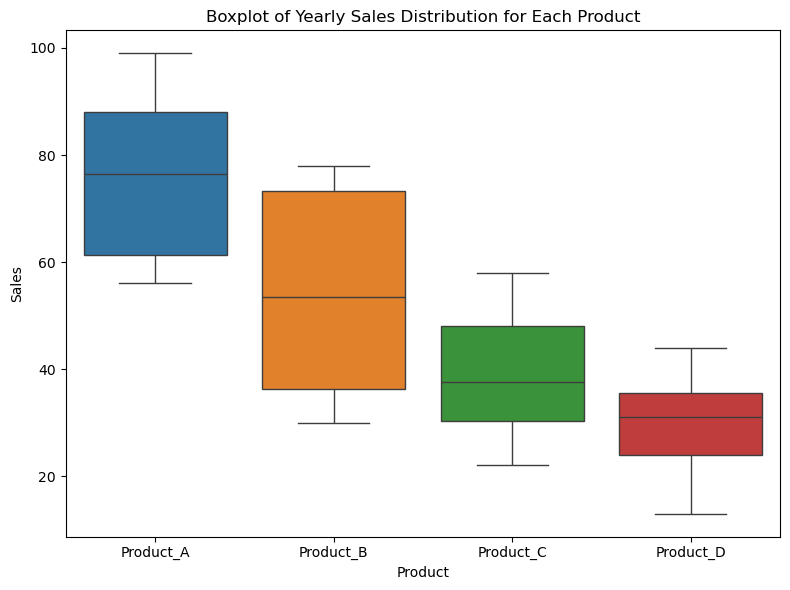

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/final.csv')
months = pd.to_datetime(df['Date']).dt.strftime('%b')

# رسم خط بياني لتطور المبيعات
print("Plotting line chart for monthly sales trend...")
plt.figure(figsize=(10, 6))
for product in ['Product_A', 'Product_B', 'Product_C', 'Product_D']:
    plt.plot(months, df[product], marker='o', label=product)
plt.title('Monthly Sales Trend for Each Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# رسم أعمدة مكدسة
print("Plotting stacked bar chart of monthly sales by product...")
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(df))
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
for product in products:
    plt.bar(months, df[product], bottom=bottom, label=product)
    bottom += df[product].values
best_month_idx = df['Total_Sales'].idxmax()
plt.annotate(
    'Best Month',
    xy=(months[best_month_idx], df['Total_Sales'][best_month_idx]),
    xytext=(months[best_month_idx], df['Total_Sales'][best_month_idx] + 20),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=12,
    color='red'
)
plt.title('Stacked Bar Chart of Monthly Sales by Product')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

# رسم خريطة حرارية (heatmap)
print("Plotting heatmap for monthly sales of each product...")
sales_matrix = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].T
sales_matrix.columns = months
plt.figure(figsize=(10, 5))
sns.heatmap(sales_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Monthly Sales for Each Product')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# رسم صندوقي (boxplot) لكل منتج
print("Plotting boxplot for yearly sales distribution for each product...")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Product_A', 'Product_B', 'Product_C', 'Product_D']])
plt.title('Boxplot of Yearly Sales Distribution for Each Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# تحميل البيانات النهائية
print("Loading data from data/final.csv...")
df = pd.read_csv('data/final.csv')

# -------------------------------
# السؤال 1: أي منتج يساهم بأكبر قدر في المبيعات خلال العام؟
# -------------------------------
# حساب إجمالي مبيعات كل منتج خلال السنة
print("Calculating total sales for each product...")
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
product_totals = df[products].sum()
best_product = product_totals.idxmax()
best_product_value = product_totals.max()

print(f"The product with the highest contribution to total annual sales is: {best_product} with {best_product_value} units.")

# -------------------------------
# السؤال 2: أي ربع سنوي كان الأفضل؟ وما التفسير المحتمل؟
# -------------------------------
# حساب إجمالي المبيعات لكل ربع
print("Calculating total sales for each quarter...")
quarter_totals = df.groupby('Quarter')['Total_Sales'].sum()
best_quarter = quarter_totals.idxmax()
best_quarter_value = quarter_totals.max()

print(f"The best performing quarter is: {best_quarter} with total sales of {best_quarter_value} units.")
print("Possible explanation: This quarter might coincide with high-demand seasons, promotional offers, or increased market activity.")

# -------------------------------
# السؤال 3: كيف يمكن استخدام هذه المعلومات لتحسين استراتيجية المبيعات في العام المقبل؟
# -------------------------------
# اقتراحات ونصائح لتحسين الاستراتيجية
print("Recommendations for improving next year's sales strategy based on current insights:")
print("- Focus marketing and stock efforts on the best-performing product to maximize overall sales.")
print("- Reinforce supply and promotions during the strongest quarter to capture peak demand.")
print("- Analyze weaker quarters and products to identify bottlenecks or new opportunities.")
print("- Consider running promotions or discounts in low-performing months to balance sales across the year.")


Loading data from data/final.csv...
Calculating total sales for each product...
The product with the highest contribution to total annual sales is: Product_A with 910 units.
Calculating total sales for each quarter...
The best performing quarter is: Q4 with total sales of 630 units.
Possible explanation: This quarter might coincide with high-demand seasons, promotional offers, or increased market activity.
Recommendations for improving next year's sales strategy based on current insights:
- Focus marketing and stock efforts on the best-performing product to maximize overall sales.
- Reinforce supply and promotions during the strongest quarter to capture peak demand.
- Analyze weaker quarters and products to identify bottlenecks or new opportunities.
- Consider running promotions or discounts in low-performing months to balance sales across the year.
